In [3]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

((50000, 32, 32, 3), numpy.ndarray, (50000, 1), 153600000)

In [6]:
train_images.shape, type(train_images), train_labels.shape, train_images.nbytes, train_images.dtype

((50000, 32, 32, 3), numpy.ndarray, (50000, 1), 153600000, dtype('uint8'))

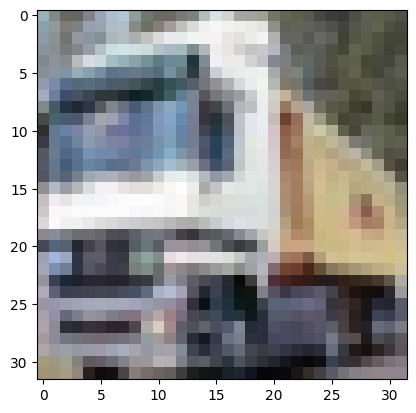

In [15]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1,:,:])

In [16]:
train_labels.shape, train_labels.ndim

((50000, 1), 2)

In [21]:
import tensorflow as tf
import numpy as np
# Initialize an empty list to hold the resized images
train_images_resized = np.empty((0, 227, 227, 3), dtype=np.uint8)

# Resize the images in smaller batches
for i in range(0, len(train_images), 1000):
    batch = np.array(tf.image.resize(train_images[i:i+1000], [227, 227]))
    batch = tf.cast(batch, tf.uint8).numpy()
    train_images_resized = np.append(train_images_resized, batch, axis=0)

MemoryError: Unable to allocate 8.64 GiB for an array with shape (15000, 227, 227, 3) and data type float32

In [4]:
import numpy as np

# Number of elements in the array
num_elements = 50000 * 32 * 32 * 3

# Size of each element in bytes (for float32)
element_size = np.dtype(np.float32).itemsize

# Total size of the array in bytes
total_size_bytes = num_elements * element_size

# Convert to gigabytes
total_size_gb = total_size_bytes / (1024 ** 3)

print(total_size_gb)

153600000 /1024 /1024 

0.57220458984375


146.484375

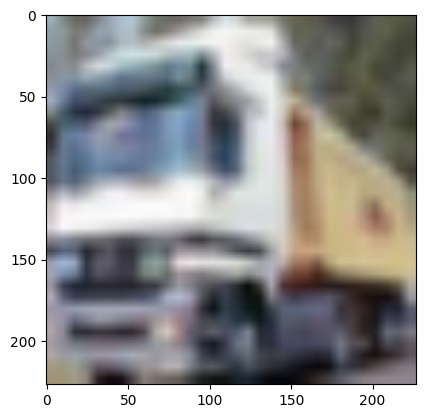

In [13]:
# Normalize the pixel values
train_images_resized_norm = train_images_resized / 255.0

# Display the image
plt.imshow(train_images_resized_norm[1,:,:])

In [28]:
train_labels[1] # 1: automobile, 2: bird, 3: cat, 4: deer, 5: dog, 6: frog, 7: horse, 8: ship, 9: truck

array([9], dtype=uint8)

In [29]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_labels.shape
train_labels.ndim

2

In [30]:
from sklearn.model_selection import train_test_split
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.2)

In [31]:
from keras import models, layers
from keras import regularizers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# adam: Adaptive Moment Estimation, a method for stochastic optimization
# sparse_categorical_crossentropy: loss function for multi-class classification
# accuracy: metric for classification
model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(valid_images, valid_labels))

Epoch 1/20
625/625 [==============================] - 36s 55ms/step - loss: 1.4993 - accuracy: 0.4618 - val_loss: 1.2841 - val_accuracy: 0.5476
Epoch 2/20
625/625 [==============================] - 40s 64ms/step - loss: 1.1468 - accuracy: 0.5972 - val_loss: 1.0780 - val_accuracy: 0.6246
Epoch 3/20
625/625 [==============================] - 33s 53ms/step - loss: 1.0027 - accuracy: 0.6499 - val_loss: 0.9806 - val_accuracy: 0.6619
Epoch 4/20
625/625 [==============================] - 31s 50ms/step - loss: 0.9107 - accuracy: 0.6817 - val_loss: 0.9534 - val_accuracy: 0.6661
Epoch 5/20
625/625 [==============================] - 34s 55ms/step - loss: 0.8249 - accuracy: 0.7142 - val_loss: 0.9318 - val_accuracy: 0.6776
Epoch 6/20
625/625 [==============================] - 32s 51ms/step - loss: 0.7564 - accuracy: 0.7372 - val_loss: 0.9345 - val_accuracy: 0.6824
Epoch 7/20
625/625 [==============================] - 31s 50ms/step - loss: 0.6922 - accuracy: 0.7585 - val_loss: 0.9060 - val_accuracy:

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
# 313 steps per epoch = 10000/32 (batch_size = 32 by default)
print("test_loss : ", test_loss,"\ntest_acc : ", test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 1.5942 - accuracy: 0.6865
test_loss :  1.5941591262817383 
test_acc :  0.6865000128746033


In [ ]:
#include <ESP8266WiFi.h>
#include <HX711.h>

#define DOUT  D4
#define SCK  D5

HX711 scale;

const char* ssid = "Quoc Phong DN";
const char* password = "nhodongtientro";

String serverName = "14.225.211.213";
String serverPath = "/api/sensor/";
const int serverPort = 80;

unsigned long lastTime = 0;  
unsigned long timerDelay = 5000;  // send readings every 5 seconds

WiFiClient client;

void setup() {
  Serial.begin(115200);
  delay(10);
  scale.begin(DOUT, SCK);

  scale.set_scale(519.111); // set the scale factor
  scale.tare();  // reset the scale to 0
  WiFi.mode(WIFI_STA);
  WiFi.begin(ssid, password); 
  Serial.println("Connecting to WiFi...");
  while (WiFi.status() != WL_CONNECTED) {
    delay(1000);
    Serial.println(".");
  }
  Serial.println("Connected to WiFi");
  Serial.print("Local IP Address: ");
  Serial.println(WiFi.localIP());
}

void loop() {
  if ((millis() - lastTime) > timerDelay) {
    if(WiFi.status()== WL_CONNECTED){
      String getBody;
      String getAll;
      if (client.connect(serverName.c_str(), serverPort)) {
        int weight = scale.get_units(10);
        Serial.println("Connection successful!"); 
        String head = "";
        String tail = "";
        client.println("POST " + serverPath + "?food_weight=" + String(weight) + " HTTP/1.1");
        client.println("Host: " + serverName);
        client.println("Content-Length: 0");
        client.println("Content-Type: text/plain");
        client.println();
        client.print(head);
        client.print(tail);
        
        int timoutTimer = 10000;
        long startTimer = millis();
        boolean state = false;
        while ((startTimer + timoutTimer) > millis()) {
          Serial.print(".");
          delay(100);      
          while (client.available()) {
            char c = client.read();
            if (c == '\n') {
              if (getAll.length()==0) { state=true; }
              getAll = "";
            }
            else if (c != '\r') { getAll += String(c); }
            if (state==true) { getBody += String(c); }
            startTimer = millis();
          }
          if (getBody.length()>0) { break; }
        }
        Serial.println();
        client.stop();
        Serial.println(getBody);
      } else {
        getBody = "Connection to " + serverName +  " failed.";
        Serial.println(getBody);
      }
    }
    else {
      Serial.println("WiFi Disconnected");
    }
    lastTime = millis();
  }
}